<a href="https://colab.research.google.com/github/adkprakash/sentiment_analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import re

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
from nltk.corpus import stopwords

In [3]:
from google.colab import drive

In [4]:
# Mount your Google Drive (authorization required)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Path to your CSV file in Google Drive
data_path='drive/My Drive/Dataset'

In [6]:
# Read the CSV file using pandas
data = pd.read_csv(data_path+'/netflix_reviews.csv')

In [7]:
data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,d123acad-4c26-41c2-97b0-592f46758853,Nikshia Bhaiwa,This is amazing app,5,0,8.114.0 build 19 50680,2024-05-18 23:04:55,8.114.0 build 19 50680
1,3370bed7-4d52-4e14-b9b8-0282138b708e,Pilot Seleam,"Unsubscribing ! , now i cant open it on my oth...",1,0,8.114.0 build 19 50680,2024-05-18 22:41:23,8.114.0 build 19 50680
2,87bc75a8-81b9-4220-8843-05d0d58f154e,nomthandazo patience,I've been trying to install this app it doesn'...,1,0,8.101.1 build 7 50601,2024-05-18 22:37:34,8.101.1 build 7 50601
3,2cb4ce60-ba5a-4a8b-b878-3df7e41d1b02,Eseme Kelly,Great App 🔥,5,0,8.108.0 build 2 50642,2024-05-18 22:33:34,8.108.0 build 2 50642
4,9ebc48ff-a622-45e8-a3b3-881f612fd016,Eitan Craft24,No me dejaba ver nada porque no estaba en mi casa,1,0,8.114.0 build 19 50680,2024-05-18 21:59:12,8.114.0 build 19 50680


In [8]:
# Dropping unwanted column by name
drop_column=['reviewId','userName','reviewCreatedVersion','at','appVersion']
data = data.drop(drop_column, axis=1)

In [9]:
data.head()

,content,score,thumbsUpCount
0,This is amazing app,5,0
1,"Unsubscribing ! , now i cant open it on my oth...",1,0
2,I've been trying to install this app it doesn'...,1,0
3,Great App 🔥,5,0
4,No me dejaba ver nada porque no estaba en mi casa,1,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109211 entries, 0 to 109210
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   content        109211 non-null  object
 1   score          109211 non-null  int64 
 2   thumbsUpCount  109211 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ MB


In [11]:
# checking NAN values in dataset
features_wid_na=[feature for feature in data.columns if data[feature].isnull().sum()>1]

In [12]:
# Percentage of NAN values
for feature in features_wid_na:
    print(feature, np.round(data[feature].isnull().mean(),4),'% missing value')

In [13]:
data['content'].drop_duplicates()

0                                       This is amazing app
1         Unsubscribing ! , now i cant open it on my oth...
2         I've been trying to install this app it doesn'...
3                                               Great App 🔥
4         No me dejaba ver nada porque no estaba en mi casa
                                ...                        
109206    i really like it! there are so many movies and...
109207     I love Netflix. I always enjoy my time using it.
109208                 Sound quality is very slow of movies
109209    Rate is very expensive.. bcos we see netflix s...
109210    this app is awesome for english movies ,series...
Name: content, Length: 108685, dtype: object

In [14]:
data['score'].value_counts()

score
1    42775
5    30635
4    13576
3    11698
2    10527
Name: count, dtype: int64

<Axes: xlabel='score', ylabel='count'>

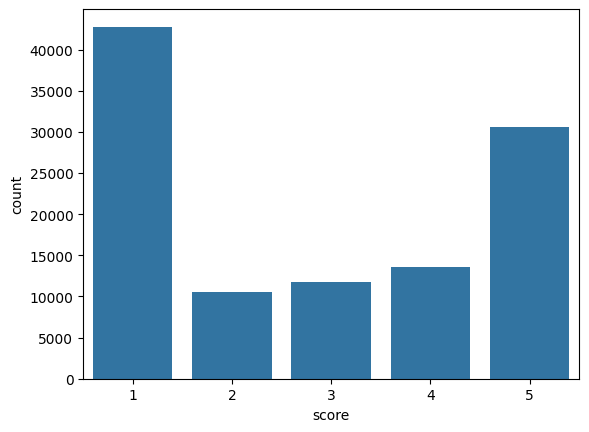

In [15]:
sns.countplot(x='score',data=data)

In [16]:
# Count unique values
num_unique_values = data['thumbsUpCount'].nunique()

# Print the result
print(f"Number of unique values in 'thumbsUpCount': {num_unique_values}")

Number of unique values in 'thumbsUpCount': 899


In [17]:
data['thumbsUpCount'].describe()

count    109211.000000
mean         10.798473
std         102.097338
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        8032.000000
Name: thumbsUpCount, dtype: float64

In [18]:
data['thumbsUpCount'].mean()

10.79847268132331

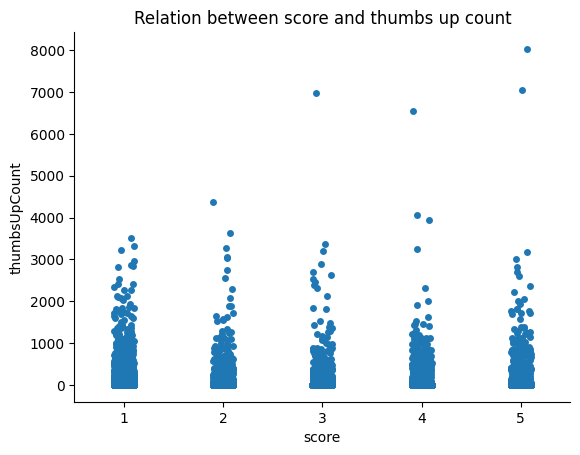

In [19]:
# Creating a strip plot
sns.stripplot(
    x = "score",
    y = "thumbsUpCount",
    data=data
)

# Customize the plot
sns.despine()  # Remove grid lines for cleaner visuals
plt.title("Relation between score and thumbs up count")  # Add a title

# Display the plot
plt.show()


In [20]:
data['score'].value_counts()

score
1    42775
5    30635
4    13576
3    11698
2    10527
Name: count, dtype: int64

In [21]:
data.head()

,content,score,thumbsUpCount
0,This is amazing app,5,0
1,"Unsubscribing ! , now i cant open it on my oth...",1,0
2,I've been trying to install this app it doesn'...,1,0
3,Great App 🔥,5,0
4,No me dejaba ver nada porque no estaba en mi casa,1,0


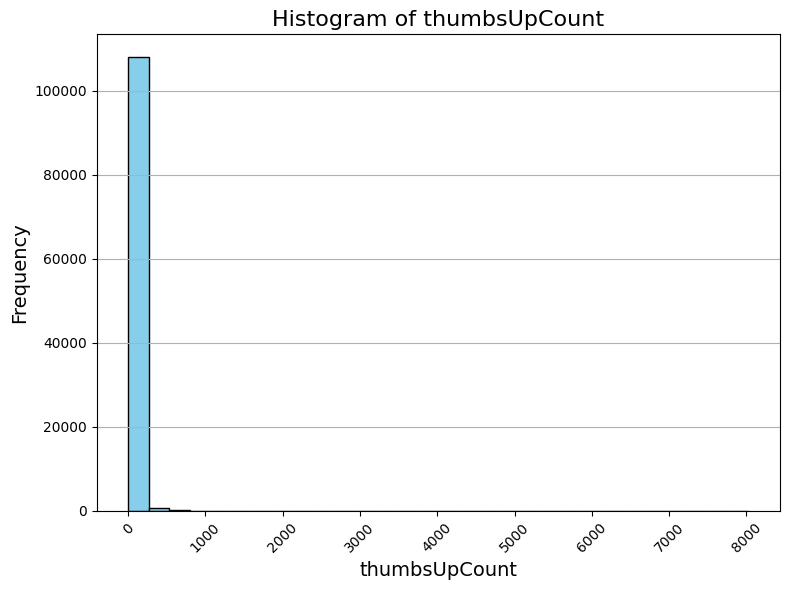

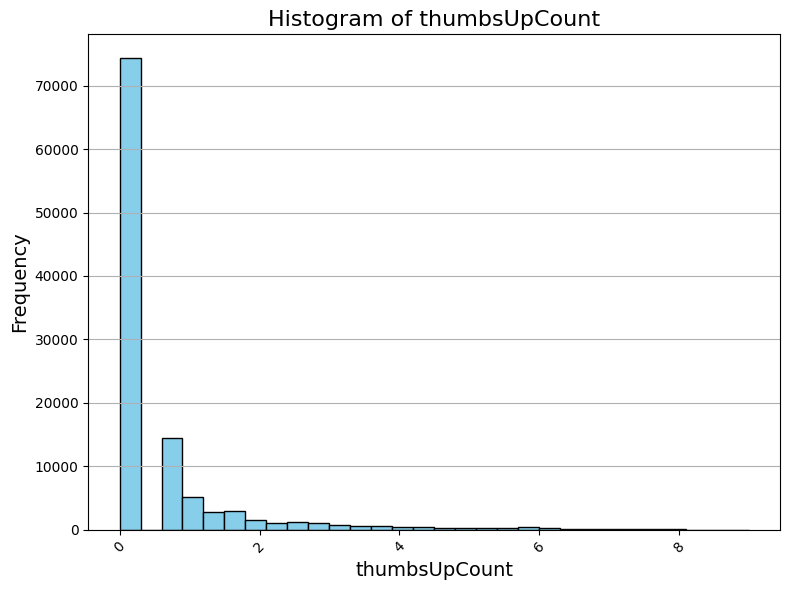

In [22]:
# Creating a hsitogram of thumbsUpCount
plt.figure(figsize=(8,6))
plt.hist(data['thumbsUpCount'], bins=30 ,color='skyblue',edgecolor='black')
plt.title(f'Histogram of thumbsUpCount',fontsize=16)
plt.xlabel('thumbsUpCount',fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Creating a hsitogram of thumbsUpCount after normalization using log
plt.figure(figsize=(8,6))
plt.hist(np.log(data['thumbsUpCount']+1), bins=30 ,color='skyblue',edgecolor='black')
plt.title(f'Histogram of thumbsUpCount',fontsize=16)
plt.xlabel('thumbsUpCount',fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text Preprocessing

In [23]:

# Text Normalizaton
# Installing contractions library for Expanding Contractions
!pip install contractions

#Importing contractions library
import contractions
# Defining a function to expand contractions
def expand_contractions(text):
    try:
        return contractions.fix(text)
    except Exception as e:
        # Handle the exception
        return text


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 13.1 MB/s eta 0:00:00


In [24]:

# Applying the function to the 'content' column using apply
data['content'] = data['content'].apply(expand_contractions)

In [25]:
data.head()

,content,score,thumbsUpCount
0,This is amazing app,5,0
1,"Unsubscribing ! , now i cannot open it on my o...",1,0
2,I have been trying to install this app it does...,1,0
3,Great App 🔥,5,0
4,No me dejaba ver nada porque no estaba en mi casa,1,0


In [26]:
def preprocess_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove numbers
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # remove emoji
        "\U0001F300-\U0001F5FF" # emoji code here:https://unicode.org/emoji/charts/full-emoji-list.html
        "\U0001F680-\U0001F6FF"
        "\U0001F1E0-\U0001F1FF"
        "\U00002500-\U00002BEF"
        "\U00002702-\U000027B0"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "\U0001f926-\U0001f937"
        "\U00010000-\U0010ffff"
        "\u2640-\u2642"
        "\u2600-\u2B55"
        "\u200d"
        "\u23cf"
        "\u23e9"
        "\u231a"
        "\ufe0f"
        "\u3030"
        "]+", flags=re.UNICODE

    )
    text = emoji_pattern.sub(r'', text)
    return text




In [27]:
# Apply Function
data['cleaned_content'] = data['content'].astype(str).apply(preprocess_text)

In [28]:
data.head()

,content,score,thumbsUpCount,cleaned_content
0,This is amazing app,5,0,this is amazing app
1,"Unsubscribing ! , now i cannot open it on my o...",1,0,unsubscribing now i cannot open it on my oth...
2,I have been trying to install this app it does...,1,0,i have been trying to install this app it does...
3,Great App 🔥,5,0,great app
4,No me dejaba ver nada porque no estaba en mi casa,1,0,no me dejaba ver nada porque no estaba en mi casa


In [29]:
data = data.drop('content', axis=1)

In [30]:
data.head()

,score,thumbsUpCount,cleaned_content
0,5,0,this is amazing app
1,1,0,unsubscribing now i cannot open it on my oth...
2,1,0,i have been trying to install this app it does...
3,5,0,great app
4,1,0,no me dejaba ver nada porque no estaba en mi casa


In [31]:
filtered_df = data[data['score'] == 5]

In [32]:
filtered_df.head()

,score,thumbsUpCount,cleaned_content
0,5,0,this is amazing app
3,5,0,great app
6,5,0,it is a great am buh i just came up with an id...
9,5,0,k ultra hd hdr p movies
10,5,0,ok


In [33]:
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [34]:
# Apply function
data['sentiment'] = data['cleaned_content'].apply(get_sentiment)

In [35]:
data.head()

,score,thumbsUpCount,cleaned_content,sentiment
0,5,0,this is amazing app,positive
1,1,0,unsubscribing now i cannot open it on my oth...,positive
2,1,0,i have been trying to install this app it does...,neutral
3,5,0,great app,positive
4,1,0,no me dejaba ver nada porque no estaba en mi casa,negative


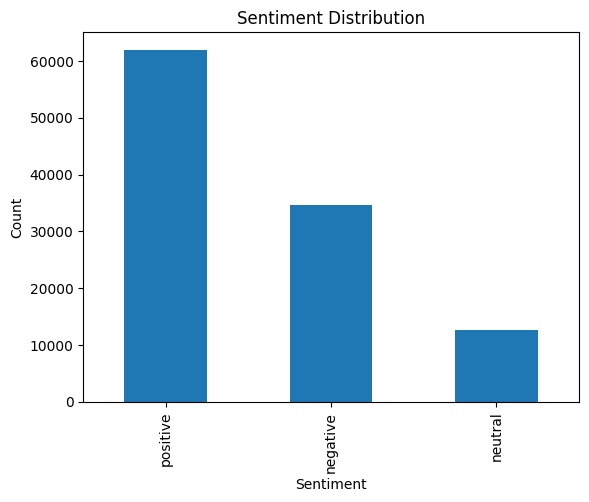

In [36]:
# Count the occurrences of each sentiment
sentiment_counts = data['sentiment'].value_counts()

# Plot the sentiment distribution
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

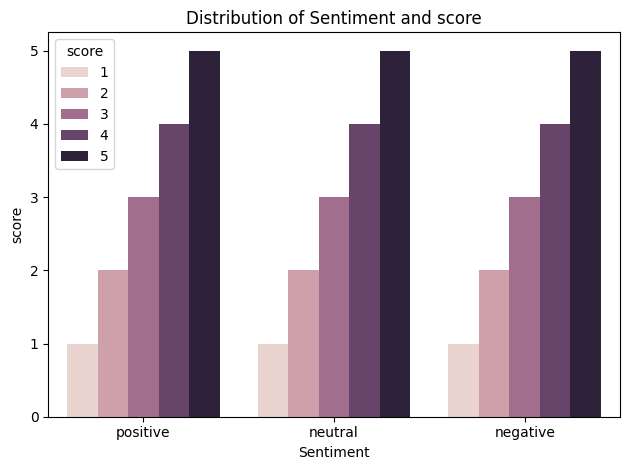

In [37]:
# Create a bar chart
sns.barplot(
    x = "sentiment",
    y = "score",
    hue = "score",
    data=data
)

# Customize the plot
plt.xlabel("Sentiment")
plt.ylabel("score")
plt.title("Distribution of Sentiment and score")
plt.tight_layout()

# Display the plot
plt.show()

Observing the data by fitering with score and sentiment

In [38]:
filtered_df_pos_one = data[(data['score'] == 1) & (data['sentiment'] == 'positive')]

In [39]:
filtered_df_pos_one.head()

,score,thumbsUpCount,cleaned_content,sentiment
1,1,0,unsubscribing now i cannot open it on my oth...,positive
16,1,1,i has account which i used on my tvrecently w...,positive
102,1,0,free vee install karo this is costly and bakw...,positive
103,1,0,household policy is terrible i am one person i...,positive
111,1,1,crashing all the time and no netflix recommend...,positive


In [40]:
filtered_df_pos_two = data[(data['score'] == 2) & (data['sentiment'] == 'positive')]

In [41]:
filtered_df_pos_two.head()

,score,thumbsUpCount,cleaned_content,sentiment
77,2,0,the prices are getting ridiculous manage your ...,positive
92,2,0,great,positive
127,2,0,please fix my netflix not open in my device,positive
171,2,0,dialogue is barely audible on tv speaker even ...,positive
184,2,7,netflix used to be my go to streaming app but ...,positive


In [42]:
filtered_df_pos_three = data[(data['score'] == 3) & (data['sentiment'] == 'positive')]

In [43]:
filtered_df_pos_three.head()

,score,thumbsUpCount,cleaned_content,sentiment
8,3,2,good content as always but the builtin brightn...,positive
13,3,0,has a lot of movies but not the latest ones li...,positive
152,3,0,good,positive
159,3,0,update the reason i uninstalled netflix is bec...,positive
162,3,0,was great at first now i have an issue with th...,positive


In [44]:
filtered_df_pos_four = data[(data['score'] == 4) & (data['sentiment'] == 'positive')]

In [45]:
filtered_df_pos_four.head()

,score,thumbsUpCount,cleaned_content,sentiment
7,4,0,i like it,positive
39,4,0,please add hitman blood money game,positive
57,4,0,it is a awesome app they just need to stop can...,positive
88,4,0,super,positive
96,4,0,nice,positive


In [46]:
filtered_df_pos_five = data[(data['score'] == 5) & (data['sentiment'] == 'positive')]

In [47]:
filtered_df_pos_five.head()

,score,thumbsUpCount,cleaned_content,sentiment
0,5,0,this is amazing app,positive
3,5,0,great app,positive
6,5,0,it is a great am buh i just came up with an id...,positive
10,5,0,ok,positive
12,5,0,love,positive


In [48]:
filtered_df_neg_five = data[(data['score'] == 5) & (data['sentiment'] == 'negative')]

In [49]:
filtered_df_neg_five.head()

,score,thumbsUpCount,cleaned_content,sentiment
19,5,0,i am not sure,negative
557,5,0,it kind of nice but it is so annoying sometim...,negative
753,5,0,it is not working properly nowits not acceptin...,negative
792,5,0,good but why did you get rid of kung fu panda ...,negative
808,5,0,not good enough but,negative


In [50]:
filtered_df_neg_four = data[(data['score'] == 4) & (data['sentiment'] == 'negative')]

In [51]:
filtered_df_neg_four.head()

,score,thumbsUpCount,cleaned_content,sentiment
319,4,0,do not solve my payment issue,negative
406,4,0,do not solve my payment issue,negative
493,4,0,do not solve my payment issue,negative
659,4,0,i have nothing to say i love this app,negative
807,4,0,i am having trouble downloading items,negative


In [52]:
filtered_df_neg_three = data[(data['score'] == 3) & (data['sentiment'] == 'negative')]

In [53]:
filtered_df_neg_three.head()

,score,thumbsUpCount,cleaned_content,sentiment
71,3,0,it is lagging and i do not know why please help,negative
210,3,0,if you prefer to watch some content in other l...,negative
281,3,0,three stars cuz they lack a lot of movies and ...,negative
290,3,0,its nice app but their is not game of thrones ...,negative
295,3,0,bruh i pay it but the feature does not really ...,negative


In [54]:
filtered_df_neg_two = data[(data['score'] == 2) & (data['sentiment'] == 'negative')]

In [55]:
filtered_df_neg_two.head()

,score,thumbsUpCount,cleaned_content,sentiment
137,2,0,not good,negative
186,2,0,lately i can only watch episodes of a series ...,negative
206,2,0,netflix always have payment issues i cannot pa...,negative
262,2,0,the app needs a lot of time loading the infos ...,negative
297,2,0,its annoying that keeps prompting game,negative


In [56]:
filtered_df_neg_one = data[(data['score'] == 1) & (data['sentiment'] == 'negative')]

In [57]:
filtered_df_neg_one.head()

,score,thumbsUpCount,cleaned_content,sentiment
4,1,0,no me dejaba ver nada porque no estaba en mi casa,negative
5,1,0,is also expensive i am not i am not paying tha...,negative
11,1,0,disgusting money grubbing the fact that they h...,negative
15,1,0,difficult to login with family members,negative
17,1,2,chromecast still missing,negative


In [58]:
filtered_df_neu_one = data[(data['score'] == 1) & (data['sentiment'] == 'neutral')]

In [59]:
filtered_df_neu_one.head()

,score,thumbsUpCount,cleaned_content,sentiment
2,1,0,i have been trying to install this app it does...,neutral
23,1,0,new update is full of glitches,neutral
27,1,0,money hungry,neutral
31,1,0,not working,neutral
33,1,0,mucha perversión en su contenido,neutral


In [60]:
filtered_df_neu_two = data[(data['score'] == 2) & (data['sentiment'] == 'neutral')]

In [61]:
filtered_df_neu_two.head()

,score,thumbsUpCount,cleaned_content,sentiment
62,2,0,there is a lot of anime movies and drama that ...,neutral
122,2,6,took off the rest of the total drama seasons o...,neutral
195,2,0,no need for code before i log in please change...,neutral
202,2,0,the app on my phone is picking up my adult pro...,neutral
253,2,0,i am unable to make payment what exactly is go...,neutral


In [62]:
filtered_df_neu_three = data[(data['score'] == 3) & (data['sentiment'] == 'neutral')]

In [63]:
filtered_df_neu_three.head()

,score,thumbsUpCount,cleaned_content,sentiment
150,3,0,it shows that i can watch pokemon horizons,neutral
193,3,0,i do not know know know why but why does my ne...,neutral
211,3,0,add all pirates to the carribean movies,neutral
241,3,0,tom is the,neutral
265,3,0,yob,neutral


In [64]:
filtered_df_neu_four = data[(data['score'] == 4) & (data['sentiment'] == 'neutral')]

In [65]:
filtered_df_neu_four.head()

,score,thumbsUpCount,cleaned_content,sentiment
18,4,0,netflix should also have a feature where we ca...,neutral
97,4,0,joseph richards single,neutral
189,4,0,f for w,neutral
197,4,0,exceptional,neutral
324,4,0,braw,neutral


In [66]:
filtered_df_neu_five = data[(data['score'] == 5) & (data['sentiment'] == 'neutral')]

In [67]:
filtered_df_neu_five.head()

,score,thumbsUpCount,cleaned_content,sentiment
9,5,0,k ultra hd hdr p movies,neutral
48,5,0,unsatisfactory,neutral
53,5,0,,neutral
54,5,0,i watch netflix sometimes,neutral
56,5,0,to,neutral


In [68]:
#dropping the data whose sentiments and score and text doesn't match
def drop_data_from_row(data):
  data.drop(data[(data['score'] == 3) & (data['sentiment'] == 'positive')].index, inplace=True)
  data.drop(data[(data['score'] == 2) & (data['sentiment'] == 'positive')].index, inplace=True)
  data.drop(data[(data['score'] == 1) & (data['sentiment'] == 'positive')].index, inplace=True)
  data.drop(data[(data['score'] == 4) & (data['sentiment'] == 'neutral')].index, inplace=True)
  data.drop(data[(data['score'] == 5) & (data['sentiment'] == 'neutral')].index, inplace=True)
  data.drop(data[(data['score'] == 1) & (data['sentiment'] == 'neutral')].index, inplace=True)
  data.drop(data[(data['score'] == 2) & (data['sentiment'] == 'neutral')].index, inplace=True)
  data.drop(data[(data['score'] == 3) & (data['sentiment'] == 'neutral')].index, inplace=True)
  return data


In [69]:
drop_data_from_row(data)

,score,thumbsUpCount,cleaned_content,sentiment
0,5,0,this is amazing app,positive
3,5,0,great app,positive
4,1,0,no me dejaba ver nada porque no estaba en mi casa,negative
5,1,0,is also expensive i am not i am not paying tha...,negative
6,5,0,it is a great am buh i just came up with an id...,positive
...,...,...,...,...
109204,5,0,good app in easy to use,positive
109206,5,0,i really like it there are so many movies and ...,positive
109207,5,0,i love netflix i always enjoy my time using it,positive
109209,1,0,rate is very expensive bcos we see netflix sun...,negative


In [70]:
data.head()

,score,thumbsUpCount,cleaned_content,sentiment
0,5,0,this is amazing app,positive
3,5,0,great app,positive
4,1,0,no me dejaba ver nada porque no estaba en mi casa,negative
5,1,0,is also expensive i am not i am not paying tha...,negative
6,5,0,it is a great am buh i just came up with an id...,positive


In [71]:
#shuffling data with the random state of 43
data.sample(frac=1, random_state=45)

,score,thumbsUpCount,cleaned_content,sentiment
35449,5,0,downloaded the netflix app for my blackberry k...,positive
34681,5,0,i would like to have more shows and movies and...,positive
96261,5,0,i like watching movies on it and i think it is...,positive
103402,1,0,it gives no way to scroll thru the selections,negative
78162,5,0,i love netflix but i wish i want the pebble an...,positive
...,...,...,...,...
21251,2,0,unable to open any shows yo watch on my phone ...,negative
92995,5,0,good app do not understand why so many people ...,positive
10045,5,81,it is still my go to choice when it comes to s...,positive
96018,5,0,love the quickness of operating the phone,positive


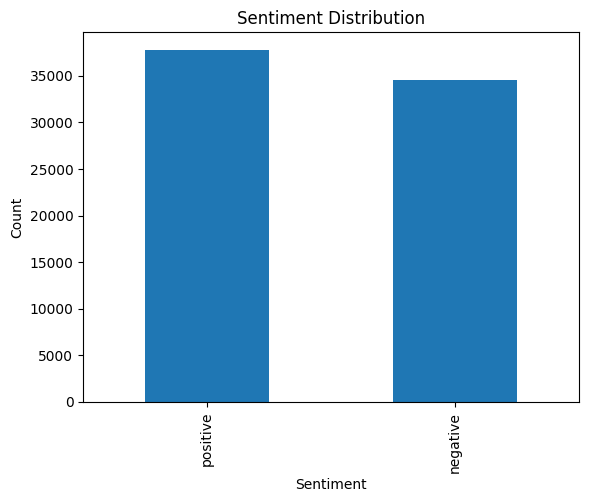

In [72]:
# Count the occurrences of each sentiment
sentiment_counts = data['sentiment'].value_counts()

# Plot the sentiment distribution
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [73]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [74]:
# Defining function to perform lemmatization
def lemmatize_text(text):

  lemmatizer = WordNetLemmatizer()
  words = [lemmatizer.lemmatize(word) for word in text.lower().split()]
  return ' '.join(words)

# Apply the function to the 'content' column (vectorized)
data['cleaned_content'] = data['cleaned_content'].apply(lemmatize_text)

In [75]:
data.head()

,score,thumbsUpCount,cleaned_content,sentiment
0,5,0,this is amazing app,positive
3,5,0,great app,positive
4,1,0,no me dejaba ver nada porque no estaba en mi casa,negative
5,1,0,is also expensive i am not i am not paying tha...,negative
6,5,0,it is a great am buh i just came up with an id...,positive


In [76]:
from wordcloud import WordCloud

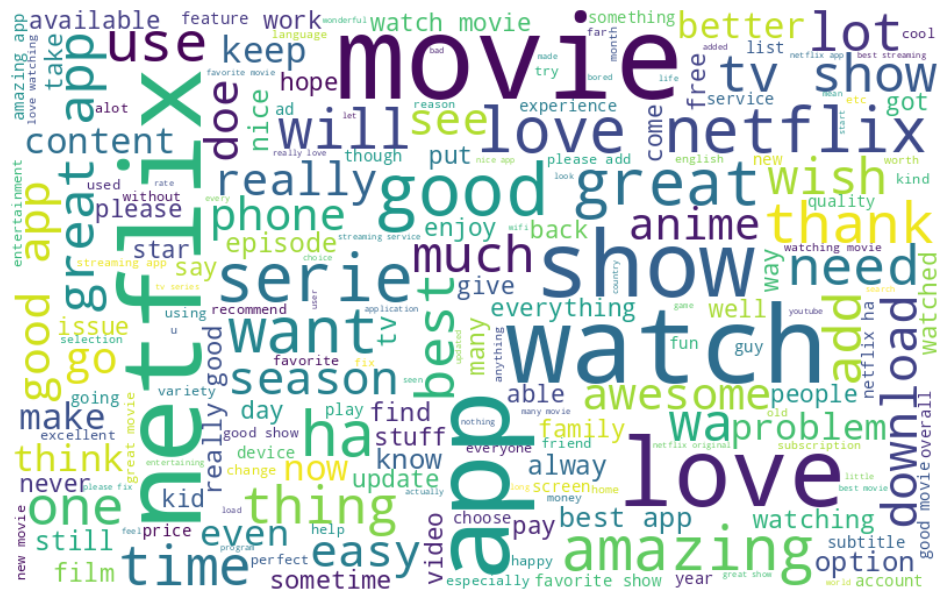

In [77]:
reviews= ' '.join(words for words in data['cleaned_content'][data['sentiment']== 'positive'].astype(str))
worldcloud= WordCloud(width=800,height=500,max_font_size=100,background_color='white').generate(reviews)
plt.figure(figsize=(12,10))
plt.imshow(worldcloud.generate(reviews),interpolation='bilinear')
plt.axis('off')
plt.show()

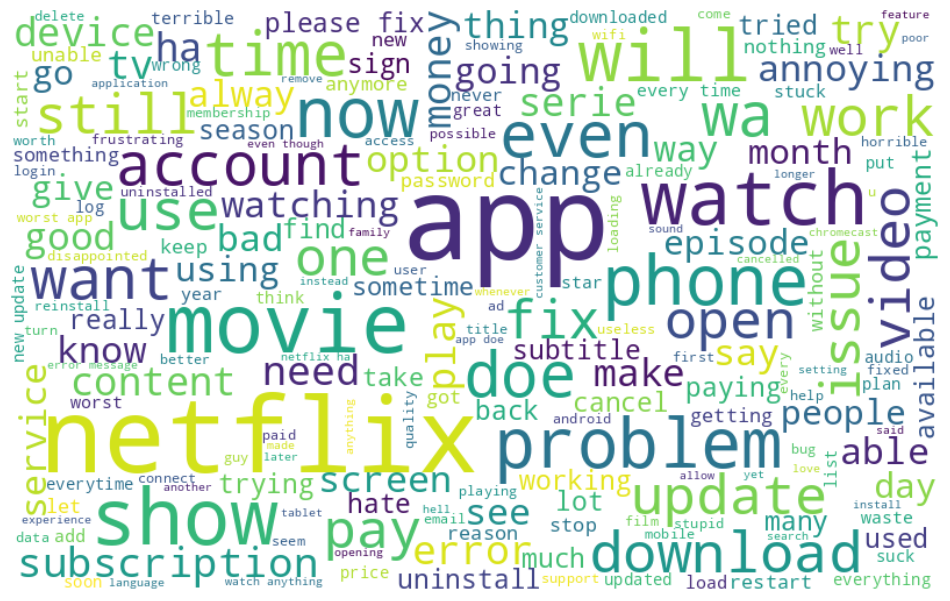

In [78]:
reviews= ' '.join(words for words in data['cleaned_content'][data['sentiment']== 'negative'].astype(str))
worldcloud= WordCloud(width=800,height=500,max_font_size=100,background_color='white').generate(reviews)
plt.figure(figsize=(12,10))
plt.imshow(worldcloud.generate(reviews),interpolation='bilinear')
plt.axis('off')
plt.show()

In [79]:
data.head()

,score,thumbsUpCount,cleaned_content,sentiment
0,5,0,this is amazing app,positive
3,5,0,great app,positive
4,1,0,no me dejaba ver nada porque no estaba en mi casa,negative
5,1,0,is also expensive i am not i am not paying tha...,negative
6,5,0,it is a great am buh i just came up with an id...,positive


In [80]:
vocabulary_size = data['cleaned_content'].str.split().explode().nunique()
print(vocabulary_size)

34122


In [81]:
# Downloading the punkt tokenizer (one-time download)
nltk.download('punkt')

def tokenize_text(text):

  tokens = nltk.word_tokenize(text)
  return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [82]:
# Apply the function to the 'content' column (vectorized)
data['cleaned_content'] = data['cleaned_content'].apply(tokenize_text)

In [83]:
data.head()

,score,thumbsUpCount,cleaned_content,sentiment
0,5,0,"[this, is, amazing, app]",positive
3,5,0,"[great, app]",positive
4,1,0,"[no, me, dejaba, ver, nada, porque, no, estaba...",negative
5,1,0,"[is, also, expensive, i, am, not, i, am, not, ...",negative
6,5,0,"[it, is, a, great, am, buh, i, just, came, up,...",positive


In [84]:
#import Word2vec from gensim library
from gensim.models.word2vec import Word2Vec

In [85]:
text_corpus = data['cleaned_content'].tolist() # Converting to list of lists

In [86]:
# Training the word2vec model
embedding_model = Word2Vec(text_corpus, min_count=1, window=10, vector_size=500, sg=1)  # sg=1 for skip-gram

In [87]:
#Getting word embeddings and similar words
word = "happy"
word_vector = embedding_model.wv[word]  # Get vector for a specific word
similar_words = embedding_model.wv.most_similar(word, topn=5)
print(f"Similar words to '{word}': {similar_words}")

Similar words to 'happy': [('satisfied', 0.7052417397499084), ('pleased', 0.6831713318824768), ('thankful', 0.6631281971931458), ('excited', 0.6566556692123413), ('impressed', 0.6530768275260925)]


In [88]:
#Saving the model for later use
#Saving in google drive
#embedding_model.save("drive/My Drive/Dataset/sentiment_analysis_model.bin")  # Saving in binary format

In [89]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

In [90]:
# Convert sentiments to numerical labels
sentiment_label_map = {'negative': 0, 'positive': 1}
y = data['sentiment'].map(sentiment_label_map).values

In [91]:
print(y)

[1 1 0 ... 1 0 1]


In [106]:
# Defining maximum vocabulary size and sequence length
max_features = 34121 # Adjusting this based on your vocabulary size
maxlen = 100  # Adjusting this based on your average sentence length


In [107]:
# Tokenizer for converting text to sequences of integers
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(data['cleaned_content'])
sequences = tokenizer.texts_to_sequences(data['cleaned_content'])

In [99]:
# Padding sequences to a fixed length
content_padded = pad_sequences(sequences, maxlen=maxlen, padding='post')

In [104]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(content_padded, y, test_size=0.2, random_state=42)

In [100]:
# Loading Pre-trained Word Embeddings from Google Drive
word_embedding_path = 'drive/My Drive/Dataset/sentiment_analysis_model.bin'
embedding_dim = 500

In [101]:
def load_word_embeddings(embedding_model, embedding_dim):

  # Get the vocabulary from the loaded model
  vocabulary = list(embedding_model.wv.key_to_index)

  # Create the embedding matrix with zeros
  embedding_matrix = np.zeros((len(vocabulary), embedding_dim))

  # Fill the embedding matrix with word vectors from the model
  for i, word in enumerate(vocabulary):
    if word in embedding_model.wv:  # Check if word exists in the model's vocabulary
      embedding_matrix[i] = embedding_model.wv[word]

  return embedding_matrix

In [102]:
# Load word embeddings using the function
embedding_matrix = load_word_embeddings(embedding_model, embedding_dim)

In [105]:
# Defining the LSTM Model
model = Sequential()
model.add(Embedding(max_features, embedding_dim, weights=[embedding_matrix], trainable=False))  # Text feature
model.add(LSTM(64, return_sequences=True,dropout=0.2, recurrent_dropout=0.2))  # 64 hidden units, return sequences for next LSTM layer
model.add(LSTM(32,dropout=0.2, recurrent_dropout=0.2))  # 32 hidden units in the second LSTM layer
model.add(Dense(1, activation='sigmoid')) #Output layer, Sigmoid for binary classification

ValueError: Layer embedding weight shape (34122, 500) is not compatible with provided weight shape (34121, 500).

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [ ]:
# Train the model
history=model.fit(X_train, y_train, epochs=30, batch_size=45, validation_data=(X_test, y_test),callbacks=[early_stopping])

In [ ]:
# Accessing training loss and accuracy
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Accessing validation loss and accuracy
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']


# Create the plot
plt.plot(train_loss, label='Training Loss',color='red')
plt.plot(val_loss, label='Validation Loss',color='blue')
plt.plot(train_accuracy, label='Training Accuracy',color='green')
plt.plot(val_accuracy, label='Validation Accuracy',color='brown')

# Customize the plot
plt.title('Model Loss and accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')  # Adjusted label for combined plot
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
import pickle
# Define filename for the pickle file
filename = 'drive/My Drive/Dataset/sentiment_analysis_model.pkl'

# Open the file in binary write mode
with open(filename, 'wb') as file:
    # Pickle the model (using highest protocol version for compatibility)
    pickle.dump(model, file, pickle.HIGHEST_PROTOCOL)

print(f'Model saved to pickle file: {filename}')

In [ ]:
#importing saved model

In [ ]:
# Specifying the file name and path
file_name = "sentiment_analysis_model.pkl"
file_path = "drive/My Drive/Dataset/" + file_name  #
#loading pkl file
import pickle
with open(file_path, 'rb') as f:
  model = pickle.load(f)

In [ ]:
print(model)

In [ ]:
# Testing a model with new data

In [ ]:
new_data="worst movie ever"

In [ ]:
new_data = expand_contractions(new_data) #calling the function of expand contraction
new_data = new_data.lower() #converting the characters in data into lowercase
new_data = remove_punctuation(new_data) #removing punctuation form text by calling the function
new_data = lemmatize_text(new_data) #lemmatization
new_data = tokenize_text(new_data)#tokenization

In [ ]:
print(new_data)

In [ ]:
#  maximum sequence length for model
max_len= len(new_data)


In [ ]:
print(max_len)

In [ ]:
# Tokenizer for converting text to sequences of integers
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(content)
content_sequences = tokenizer.texts_to_sequences(new_data)

In [ ]:
print(content_sequences)

In [ ]:
padded_new_sequence = pad_sequences(content_sequences, maxlen=max_len)

In [ ]:
print(padded_new_sequence)

In [ ]:
def predict_sentiment(new_text):
  prediction = model.predict(padded_new_sequence)
  sentiment = prediction[0][0]  # Assuming single output for sigmoid

  # Apply threshold for classification
  if sentiment > 0.5:
    predicted_label = "positive"
  else:
    predicted_label = "negative"

  return predicted_label

In [ ]:
output=predict_sentiment(new_data)

In [ ]:
print(output)